In [1]:
from __future__ import print_function
"""Basic example 1 for eFEL"""

'Basic example 1 for eFEL'

In [2]:
import os
import efel

import numpy

In [3]:
data = numpy.loadtxt('example_trace1.txt')
data

array([[ 0.00000000e+00, -7.56837997e+01],
       [ 2.50000012e-01, -7.56213074e+01],
       [ 5.00000024e-01, -7.56213074e+01],
       ...,
       [ 2.99925017e+03, -7.83711777e+01],
       [ 2.99950004e+03, -7.84649200e+01],
       [ 2.99975014e+03, -7.83086777e+01]])

In [4]:
# Time is the first column
time = data[:, 0]
# Voltage is the second column
voltage = data[:, 1]

# Now we will construct the datastructure that will be passed to eFEL

# A 'trace' is a dictionary
trace1 = {}

# Set the 'T' (=time) key of the trace
trace1['T'] = time

# Set the 'V' (=voltage) key of the trace
trace1['V'] = voltage

# Set the 'stim_start' (time at which a stimulus starts, in ms)
# key of the trace
# Warning: this need to be a list (with one element)
trace1['stim_start'] = [700]

# Set the 'stim_end' (time at which a stimulus end) key of the trace
# Warning: this need to be a list (with one element)
trace1['stim_end'] = [2700]

# Multiple traces can be passed to the eFEL at the same time, so the
# argument should be a list
traces = [trace1]

In [5]:
import matplotlib.pyplot as plt

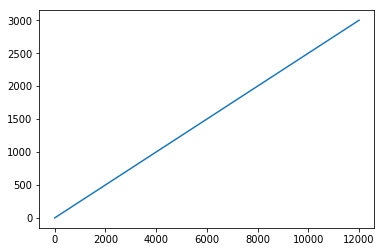

In [6]:
plt.plot(trace1['T'])

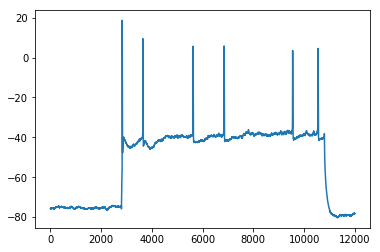

In [7]:
plt.plot(trace1['V'])

In [8]:
traces

[{'T': array([0.00000000e+00, 2.50000012e-01, 5.00000024e-01, ...,
         2.99925017e+03, 2.99950004e+03, 2.99975014e+03]),
  'V': array([-75.68379974, -75.62130737, -75.62130737, ..., -78.37117767,
         -78.46492004, -78.30867767]),
  'stim_start': [700],
  'stim_end': [2700]}]

In [9]:
import numpy as np

In [10]:
np.shape(trace1['V'])

(12000,)

In [11]:
np.shape(trace1['T'])

(12000,)

In [12]:
# Now we pass 'traces' to the efel and ask it to calculate the feature
# values
traces_results = efel.getFeatureValues(traces,
                                       ['AP_amplitude', 'voltage_base'])

In [13]:
# The return value is a list of trace_results, every trace_results
# corresponds to one trace in the 'traces' list above (in same order)
for trace_results in traces_results:
    # trace_result is a dictionary, with as keys the requested features
    for feature_name, feature_values in trace_results.items():
        print("Feature %s has the following values: %s" % \
            (feature_name, ', '.join([str(x) for x in feature_values])))

Feature AP_amplitude has the following values: 72.57824412616736, 46.36725526181844, 41.154667915823914, 39.76317509528857, 36.161465303116316, 37.848929573728334
Feature voltage_base has the following values: -74.71283577400435
